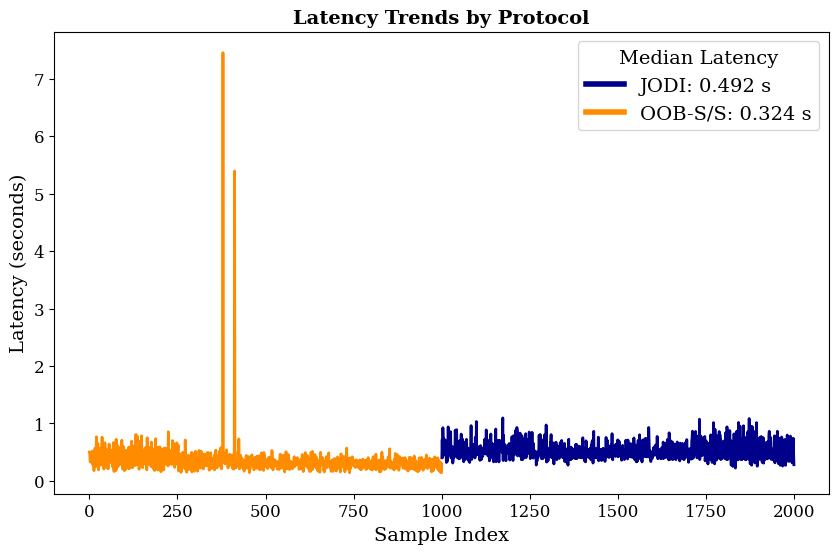

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Define protocol labels for convenience
oobss = 'oob-s/s'
jodi = 'jodi'

# Set global font settings to serif for academic formatting
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12

# Load the CSV file
df = pd.read_csv("../experiment-3.csv")

# Convert latency from milliseconds to seconds
df["latency"] = df["latency"] / 1000

# --------------------------------------------------------
# REMOVE these two lines so you do NOT overwrite protocols:
# df = df.iloc[:2000].copy().reset_index(drop=True)
# df["protocol"] = [oobss] * 1000 + [jodi] * 1000
# --------------------------------------------------------

# Define color palette for each protocol
color_palette = {jodi: "darkblue", oobss: "darkorange"}

# Create the line chart
plt.figure(figsize=(10, 6))

# Plot a line for each protocol in the dataset
for protocol in [oobss, jodi]:
    subset = df[df["protocol"] == protocol]
    plt.plot(subset.index,
             subset["latency"],
             label=protocol.upper(),
             color=color_palette[protocol],
             linewidth=2)

# Compute median latency for each protocol
median_values = df.groupby("protocol")["latency"].median()

# Create a custom legend showing median latency
handles = [
    plt.Line2D([0], [0],
               color=color_palette[jodi],
               lw=4,
               label=f"{jodi.upper()}: {median_values[jodi]:.3f} s"),
    plt.Line2D([0], [0],
               color=color_palette[oobss],
               lw=4,
               label=f"{oobss.upper()}: {median_values[oobss]:.3f} s"),
]
plt.legend(handles=handles, title="Median Latency", title_fontsize="14", fontsize="14")

# Labels and title
plt.title("Latency Trends by Protocol", fontsize=14, fontweight='bold')
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Latency (seconds)", fontsize=14)

# Save as high-resolution PDF
pdf_path = "../charts/latency_line_by_index.pdf"
plt.savefig(pdf_path, format="pdf", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()
